# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/bases_de_dados/advertising.csv')
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

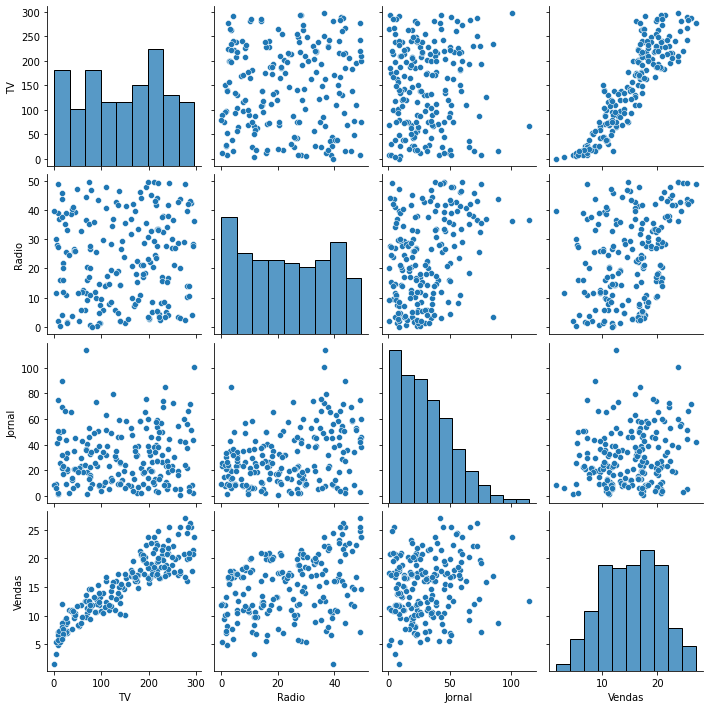

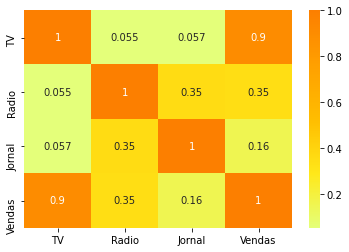

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

sns.heatmap(df.corr(), cmap='Wistia', annot=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [11]:
from sklearn.model_selection import train_test_split

x = df.drop('Vendas', axis=1)
y = df['Vendas']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear = LinearRegression()
randomforest = RandomForestRegressor()

linear.fit(x_treino, y_treino)
randomforest.fit(x_treino, y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [15]:
from sklearn import metrics

teste_linear = linear.predict(x_teste)
teste_random = randomforest.predict(x_teste)

r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_random = metrics.r2_score(y_teste, teste_random)
print(r2_linear, r2_random)

# erro

erro_linear = metrics.mean_squared_error(y_teste, teste_linear)
erro_random = metrics.mean_squared_error(y_teste, teste_random)
print(erro_linear, erro_random)

0.9059643883745369 0.9404630032869903
2.713588517986346 1.718060933333332


#### Visualização Gráfica das Previsões

In [17]:
tabela_comparacao = pd.DataFrame()
tabela_comparacao['Vendas Reais'] = y_teste
tabela_comparacao['Previsão Random'] = teste_random

tabela_comparacao.reset_index(drop=True, inplace=True)

tabela_comparacao

,Vendas Reais,Previsão Random
0,10.6,11.659
1,22.2,22.400
2,22.6,22.739
3,20.5,20.199
4,17.9,17.598
5,16.7,17.311
6,16.5,16.947
7,20.7,21.901
8,10.1,15.232
9,7.3,7.110


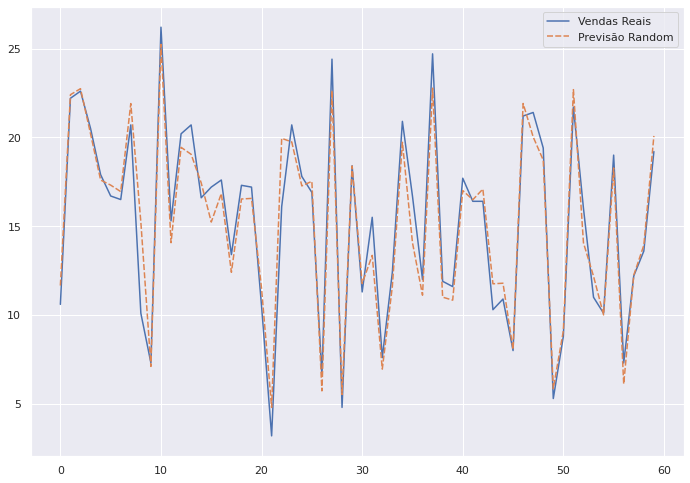

In [21]:
sns.lineplot(data=tabela_comparacao)
sns.set(rc={'figure.figsize':(12, 8)})

#### Qual a importância de cada variável para as vendas?

In [22]:
randomforest.feature_importances_
# TV, Rádio, Jornal

array([0.84872387, 0.136715  , 0.01456114])

#### Será que estamos investindo certo?

In [24]:
df[['Radio', 'Jornal']].sum()

Radio     4652.8
Jornal    6110.8
dtype: float64